<a href="https://colab.research.google.com/github/wllalex/wllalex.github.io/blob/master/Uber_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [37]:
import numpy as np
import pandas as pd
import glob
import os

Read 6 CSV files

In [2]:
df1 = pd.read_csv("/content/uber-raw-data-apr14.csv")
df2 = pd.read_csv("/content/uber-raw-data-aug14.csv")
df3 = pd.read_csv("/content/uber-raw-data-jul14.csv")
df4 = pd.read_csv("/content/uber-raw-data-jun14.csv")
df5 = pd.read_csv("/content/uber-raw-data-may14.csv")
df6 = pd.read_csv("/content/uber-raw-data-sep14.csv")

Row bind using pandas concatenate

In [3]:
data_full = pd.concat([df1,df2,df3,df4,df5,df6])

In [4]:
data_full.shape

(4534327, 4)

Select feature

In [5]:
clus= data_full[['Lat','Lon']]
clus.dtypes

Lat    float64
Lon    float64
dtype: object

Plot the number of clusters

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

AttributeError: ignored

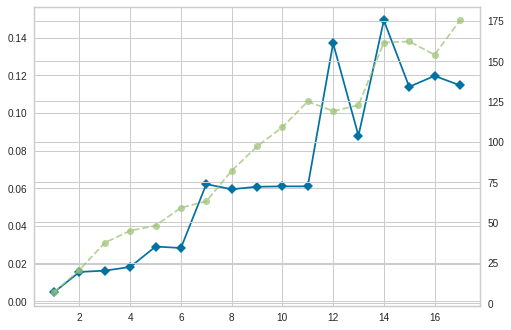

In [7]:
model = KMeans()
visualizer = KElbowVisualizer(model, k = (1, 18))
visualizer.fit(clus)
visualizer.show()

Assign clusters in K-Means Algo

In [8]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

Store Cluster Centroids

In [9]:
centroids = kmeans.cluster_centers_
centroids

array([[ 40.71593409, -73.98969997],
       [ 40.6657801 , -73.7642173 ],
       [ 40.79667738, -73.87935792],
       [ 40.76227403, -73.97694719],
       [ 40.69508585, -74.20165966]])

In [10]:
clocation = pd.DataFrame(centroids, columns=['Latitude', 'Longitude'])

In [11]:
clocation.head()

,Latitude,Longitude
0,40.715934,-73.989700
1,40.665780,-73.764217
2,40.796677,-73.879358
3,40.762274,-73.976947
4,40.695086,-74.201660


Visualize centroids

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  """Entry point for launching an IPython kernel.


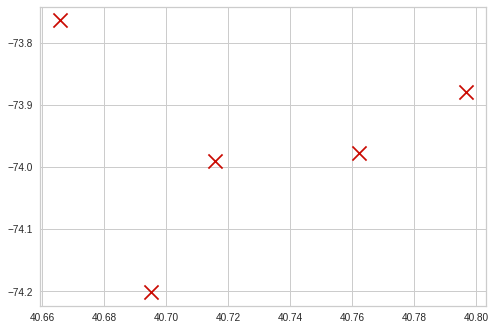

In [12]:
plt.scatter(clocation['Latitude'],clocation['Longitude'], marker ="x", color = 'R', s= 200)

In [15]:
import folium
centroid = clocation.values.tolist()

In [17]:
map = folium.Map(location = [40.71600413400166, -73.98971408426613], zoom_start = 10)
for point in range(0, len(centroid)):
    folium.marker(centroid[point], popup = centroid[point]).add_to(map)

map

AttributeError: ignored

Group and visualize the number of clusters

In [18]:
label = kmeans.labels_
label

array([3, 0, 0, ..., 2, 0, 0], dtype=int32)

In [19]:
data_new = data_full.copy()
data_new['Clusters'] = label
data_new

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,3
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,3
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,3
...,...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764,3
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764,4
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764,2
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764,0


Check for null

In [25]:
data_new.isnull().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
Clusters     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


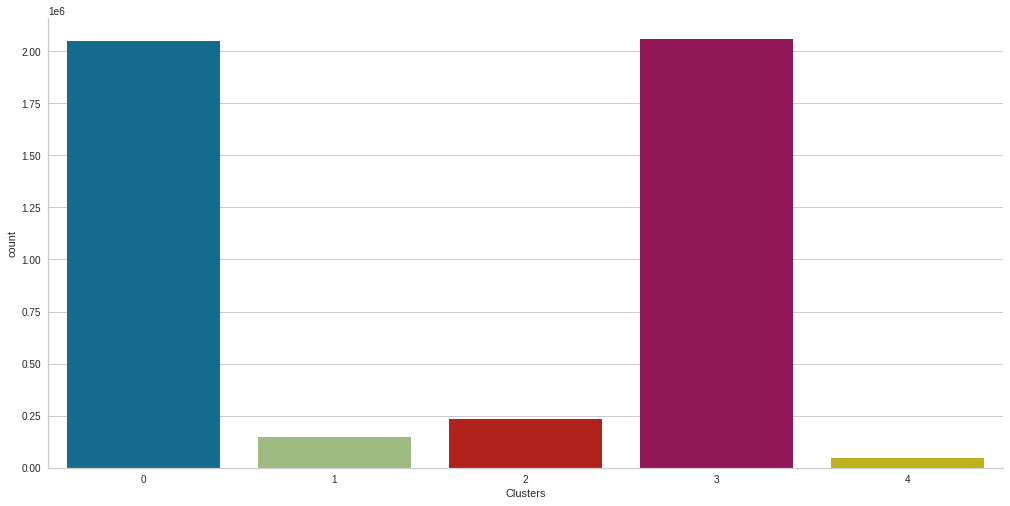

In [20]:
import seaborn as sb
sb.factorplot(data = data_new, x = "Clusters", kind = "count", size = 7, aspect = 2)

Compare the cluster

In [21]:
count_3 = 0
count_0 = 0
for value in data_new['Clusters']:
  if value == 3:
    count_3 += 1
  if value == 0:
    count_0 += 1
print(count_0, count_3)

2048295 2057619


Predict cluster for new location

In [22]:
new_location = [(40.86, -75.56)]
kmeans.predict(new_location)

array([4], dtype=int32)

In [23]:
new_location = [(40.85,-73.93)]
kmeans.predict(new_location)

array([2], dtype=int32)

In [24]:
new_location = [(40.76,-73.98)]
kmeans.predict(new_location)

array([3], dtype=int32)

Expand DateTime

In [48]:
data_new.head()

,Date/Time,Lat,Lon,Base,Clusters
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,3
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,3
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,3


In [50]:
data_new['Date/Time'] = data_new['Date/Time'].map(pd.to_datetime)

In [51]:
def get_dom(dt):
  return dt.day

  data_new['dom'] = data_new['Date/Time'].map(get_dom)

  data_new.tail()

In [52]:
data_new.head()

,Date/Time,Lat,Lon,Base,Clusters
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,3
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,3
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,3
